# EXPLORATORY DATA ANALYSIS

***DATA SOURCE***: https://www.kaggle.com/c/titanic/data?select=train.csv

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**DATA LOADING/EXTRACTION**

**READING THE TITANIC TRAINING SET DATA**

In [ ]:
# Load the dataset
titanic_df = pd.read_csv("/content/train.csv")

**OVERVIEW OF THE DATASET**

In [ ]:
# Display the first few rows of the dataset
print(titanic_df.head())
# Display the shape of the dataset
print(titanic_df.shape)
# Display the information about the dataset
print(titanic_df.info())
# Summary statistics
print(titanic_df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

**DATA CLEANING**

In [ ]:
#Check for missing values
print(titanic_df.isnull().sum())

# Handle missing values
# For simplicity, we'll fill missing values in 'Age' column with median age, and in 'Embarked' column with mode
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Check for duplicate rows
print("Number of duplicate rows:", titanic_df.duplicated().sum())

# Drop duplicate rows if any
titanic_df.drop_duplicates(inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of duplicate rows: 0


**VISUALIZATION AND ANALYSIS**

**Correlational analysis**

In [ ]:
correlation_matrix = titanic_df.corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<ipython-input-12-c7754b241482>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_df.corr()


**Outlier Detection**

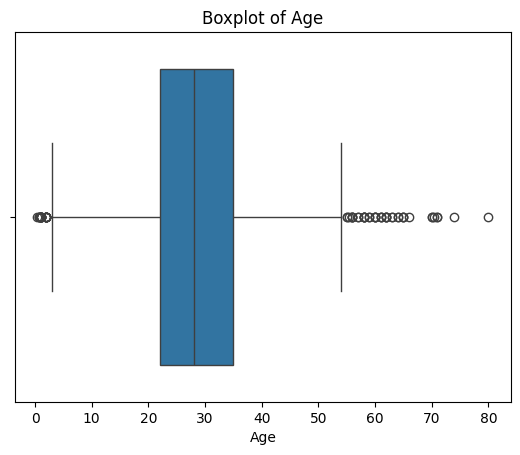

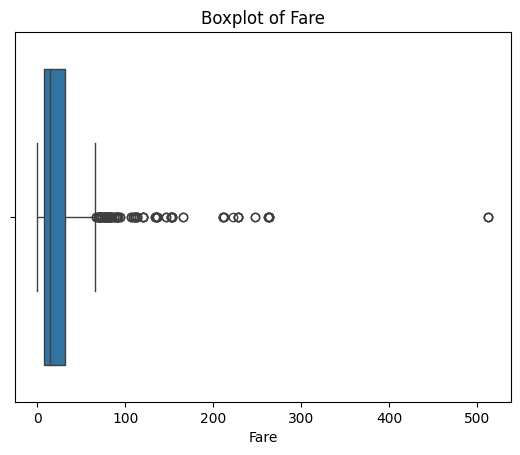

In [ ]:
# Outlier detection for 'Age' and 'Fare'
sns.boxplot(x='Age', data=titanic_df)
plt.title('Boxplot of Age')
plt.show()

sns.boxplot(x='Fare', data=titanic_df)
plt.title('Boxplot of Fare')
plt.show()

**Bivariate Analysis**

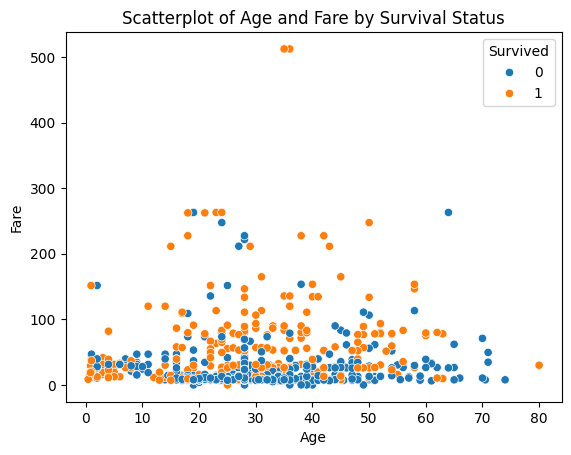

In [ ]:
# Bivariate analysis of 'Age' and 'Fare' by 'Survived' status
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Scatterplot of Age and Fare by Survival Status')
plt.show()


**Categorical Variable Analysis**

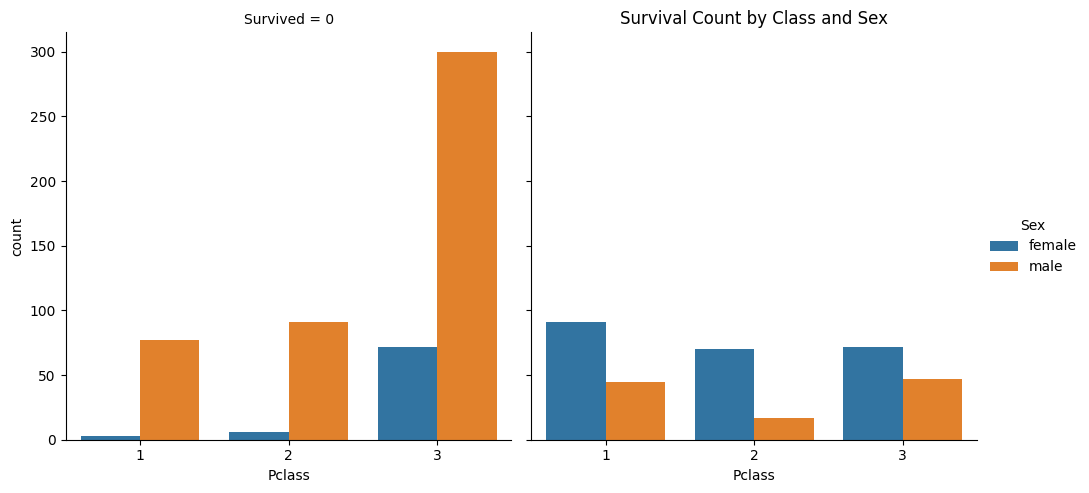

In [ ]:
# Categorical variable analysis: Survival by Class and Sex
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=titanic_df, kind='count')
plt.title('Survival Count by Class and Sex')
plt.show()

**Numerical Variable Analysis**

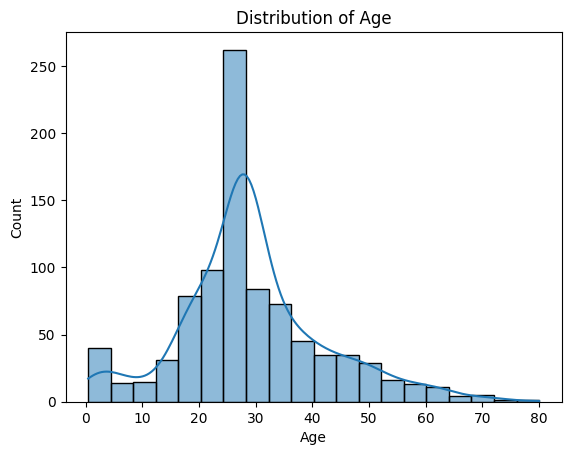

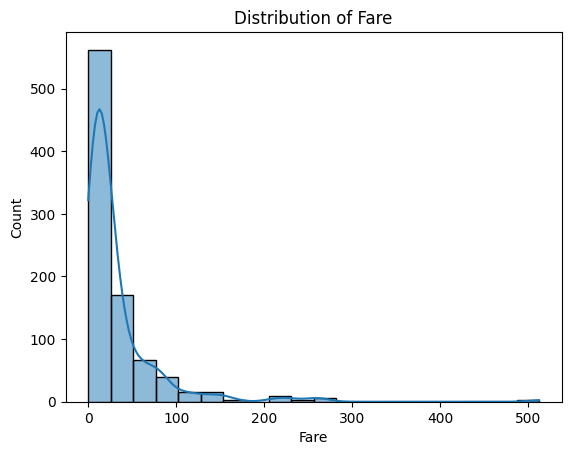

In [ ]:
# Distribution of numerical variables
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.histplot(titanic_df['Fare'], bins=20, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

**Relationship Between Variables**

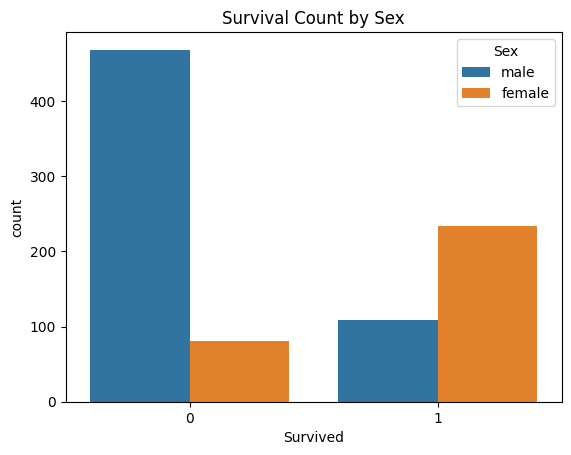

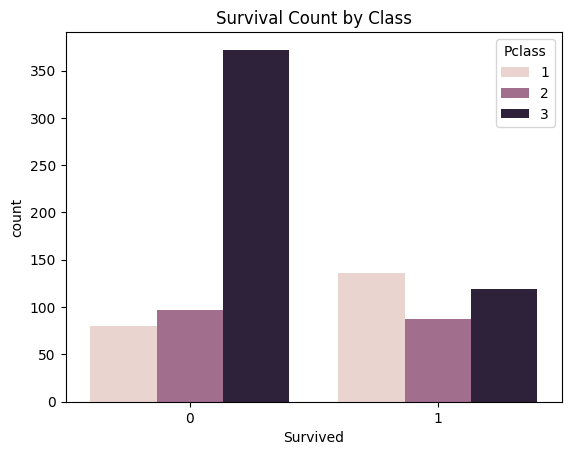

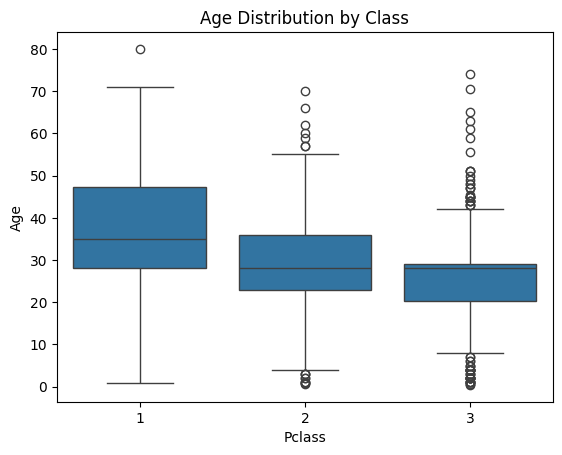

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Sex')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Count by Class')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age Distribution by Class')
plt.show()